In [1]:
import pandas as pd
import numpy as np
from WindPy import w
import matplotlib.pyplot as plt
import empyrical
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
start_date, end_date = '2010-01-01', '2020-05-19'

In [4]:
data = w.wsd('801222.SI,801101.SI,000906.SH', 'close', start_date, end_date)

In [5]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)
df.index = pd.to_datetime(df.index)

In [6]:
df['计算机应用'] = df['801222.SI'].pct_change() - df['000906.SH'].pct_change()
df['计算机设备'] = df['801101.SI'].pct_change() - df['000906.SH'].pct_change()

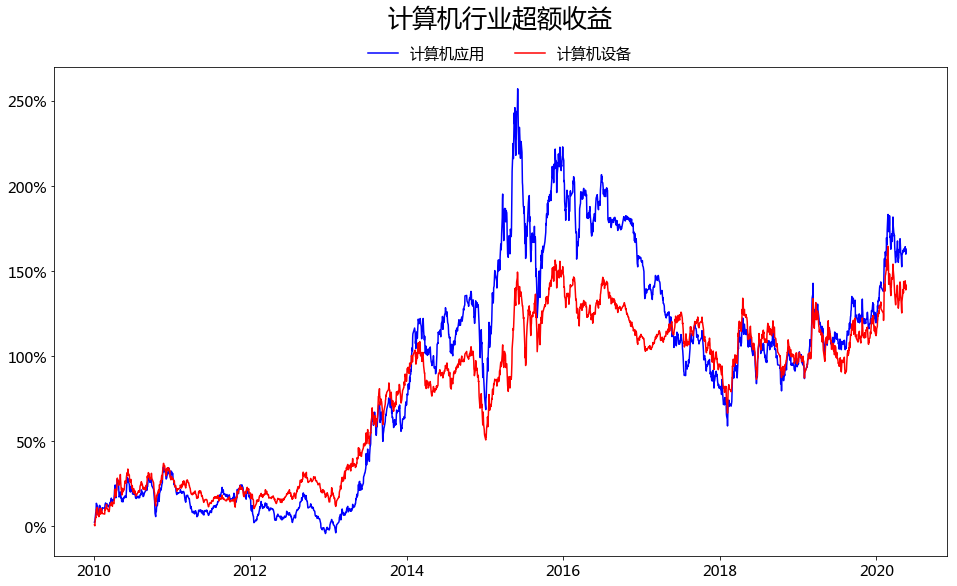

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1+df['计算机应用']).cumprod()-1, color='blue', label=u'计算机应用')
lns2 = ax.plot((1+df['计算机设备']).cumprod()-1, color='red', label='计算机设备')

# Legend
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])

_ = ax.set_title('计算机行业超额收益', fontsize=25, y=1.07)

# 计算机行业超额与经济周期的关系

In [8]:
data = w.edb('S0059744,S0059749', start_date, end_date)

In [9]:
rate = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['1y', '10y'])
rate.index = pd.to_datetime(rate.index)

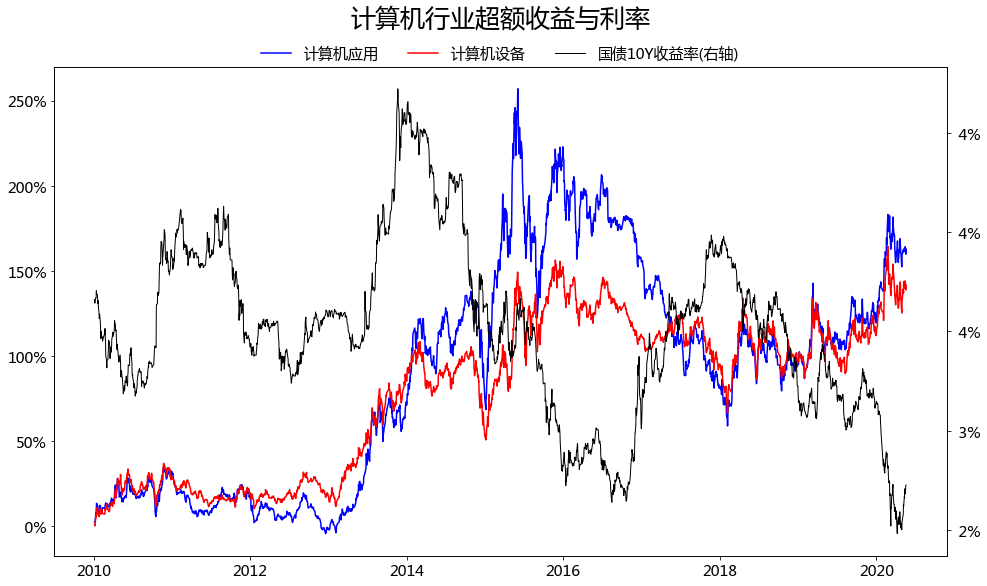

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1+df['计算机应用']).cumprod()-1, color='blue', label=u'计算机应用')
lns2 = ax.plot((1+df['计算机设备']).cumprod()-1, color='red', label='计算机设备')
axx = ax.twinx()
lns3 = axx.plot(rate['10y'], color='black', linewidth=1, label='国债10Y收益率(右轴)')

# Legend
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
vals = axx.get_yticks()
axx.set_yticklabels(['{:2.0f}%'.format(x) for x in vals])

_ = ax.set_title('计算机行业超额收益与利率', fontsize=25, y=1.07)

In [11]:
data = w.edb('M0000561', start_date, end_date)

In [12]:
inventory = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['inv'])

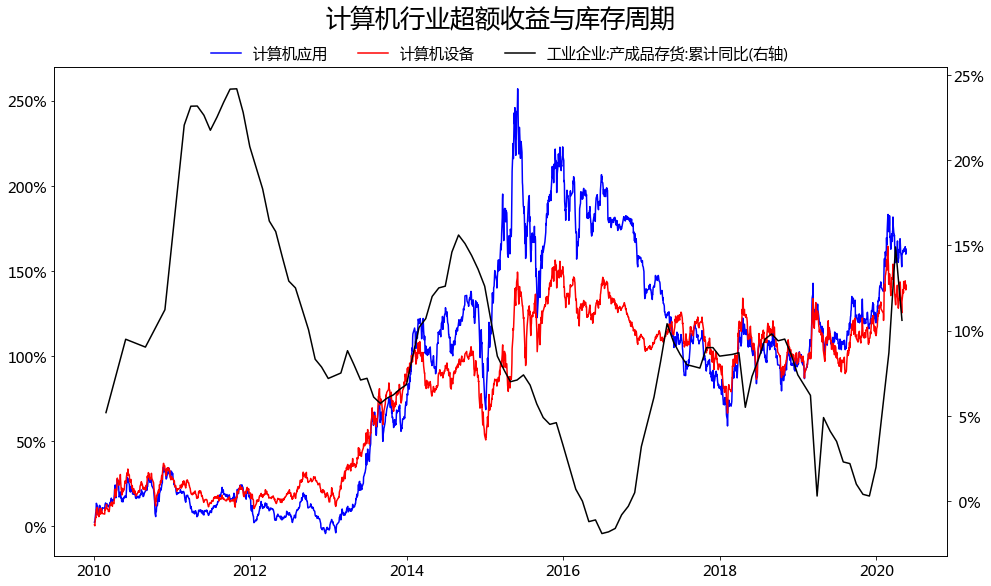

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1+df['计算机应用']).cumprod()-1, color='blue', label=u'计算机应用')
lns2 = ax.plot((1+df['计算机设备']).cumprod()-1, color='red', label='计算机设备')
axx = ax.twinx()
lns3 = axx.plot(inventory, color='black', label='工业企业:产成品存货:累计同比(右轴)')

# Legend
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
vals = axx.get_yticks()
axx.set_yticklabels(['{:2.0f}%'.format(x) for x in vals])

_ = ax.set_title('计算机行业超额收益与库存周期', fontsize=25, y=1.07)

# 计算机行业超额与期限利差

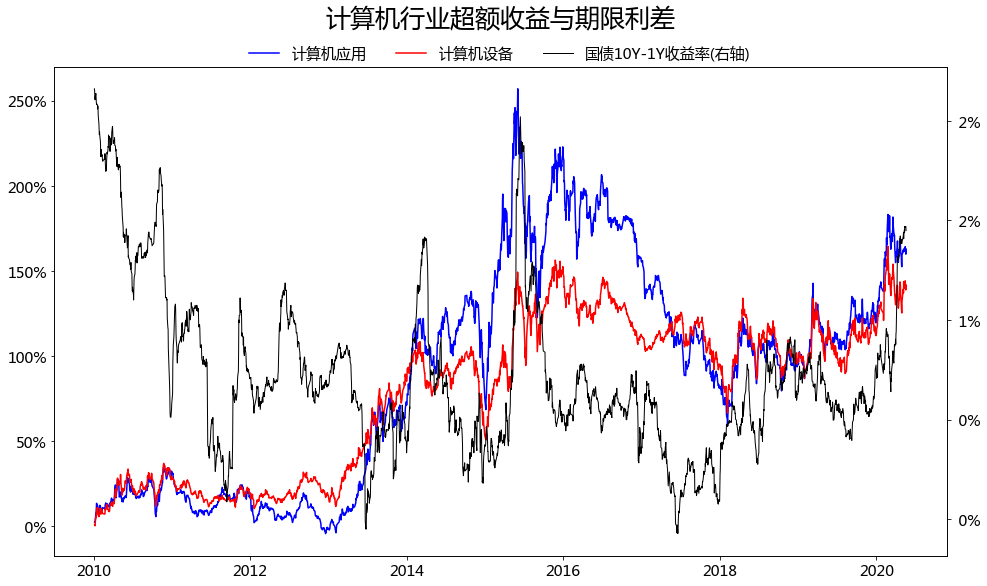

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1+df['计算机应用']).cumprod()-1, color='blue', label=u'计算机应用')
lns2 = ax.plot((1+df['计算机设备']).cumprod()-1, color='red', label='计算机设备')
axx = ax.twinx()
lns3 = axx.plot(rate['10y'] - rate['1y'], color='black', linewidth=1, label='国债10Y-1Y收益率(右轴)')

# Legend
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
vals = axx.get_yticks()
axx.set_yticklabels(['{:2.0f}%'.format(x) for x in vals])

_ = ax.set_title('计算机行业超额收益与期限利差', fontsize=25, y=1.07)

# 计算机行业超额与风险偏好的关系

In [15]:
risk_df = pd.read_excel('//hfm-pubshare/HFM各部门共享/资产配置/asset_allocation/data/中国风险偏好指数历史数据.xlsx')

In [16]:
risk = risk_df.mean(axis=1)

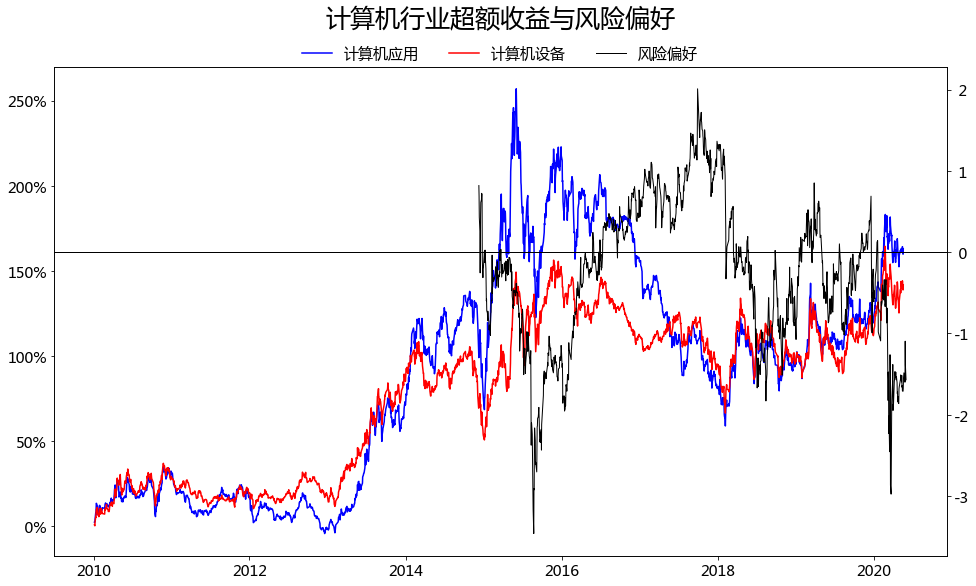

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot((1+df['计算机应用']).cumprod()-1, color='blue', label=u'计算机应用')
lns2 = ax.plot((1+df['计算机设备']).cumprod()-1, color='red', label='计算机设备')
axx = ax.twinx()
lns3 = axx.plot(risk, color='black', linewidth=1, label='风险偏好')
axx.axhline(y=0, color='black', linewidth=1)

# Legend
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
vals = axx.get_yticks()
axx.set_yticklabels(['{:2.0f}'.format(x) for x in vals])
 
_ = ax.set_title('计算机行业超额收益与风险偏好', fontsize=25, y=1.07)